In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt



,OBJECTID,UVID,BOUWWERKCO,AFSTOOTSTA,Shape_Leng,Shape_Area,EAN,geometry
0,2,8NF-W7M-MMJG-HQ1,6221AC125_01,nietinafstoting,272.393826,2917.962565,EAN_871690421364903296,"POLYGON Z ((177229.538 317262.078 0, 177256.05..."
1,3,H3P-SBD-MNG1-EEY,3313K25_01,nietinafstoting,885.742739,7680.699429,EAN_871689276000063698,"POLYGON Z ((108347.993 425810.848 0, 108356.65..."
2,4,T10-8K4-S2KB-5F3,7334LVW490_02,nietinafstoting,244.542108,1363.906093,EAN_871687110001854256,"POLYGON Z ((194192.907 465709.195 0, 194258.20..."
3,5,12T-GT1-86ZY-68R,2515R50_01,nietinafstoting,329.932221,2322.523005,EAN_871689200000013384,"POLYGON Z ((82000.798 455304.865 0, 82000.646 ..."
4,6,EAP-AJC-PVF1-3AP,2511T147_01,nietinafstoting,364.144225,5020.276578,EAN_871689200008171789,"POLYGON Z ((82030.926 455069.13 0, 82004.844 4..."


Index(['OBJECTID', 'UVID', 'BOUWWERKCO', 'AFSTOOTSTA', 'Shape_Leng',
       'Shape_Area', 'EAN', 'geometry'],
      dtype='object')
EPSG:28992


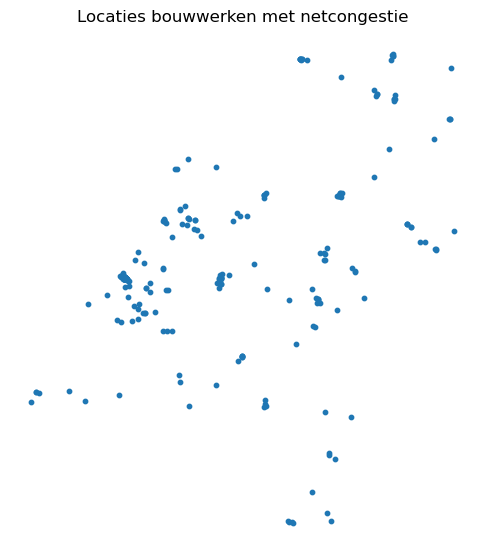

In [33]:

gdf = gpd.read_file("Bouwwerken_netcongestie_data/Bouwwerken_netcongestie.shp")

display(gdf.head())       # first rows
print(gdf.columns)      # list of all attribute columns
print(gdf.crs)          # coordinate reference system


# Use centroids as points
points = gdf.copy()
points["geometry"] = points.geometry.centroid

fig, ax = plt.subplots(figsize=(6, 8))
points.plot(ax=ax, markersize=10)  # big dots so you can see them
ax.set_title("Locaties bouwwerken met netcongestie")
ax.set_axis_off()
plt.show()

Bouwwerken shapefile:


,OBJECTID,UVID,BOUWWERKCO,AFSTOOTSTA,Shape_Leng,Shape_Area,EAN,geometry
0,2,8NF-W7M-MMJG-HQ1,6221AC125_01,nietinafstoting,272.393826,2917.962565,EAN_871690421364903296,"POLYGON Z ((177229.538 317262.078 0, 177256.05..."
1,3,H3P-SBD-MNG1-EEY,3313K25_01,nietinafstoting,885.742739,7680.699429,EAN_871689276000063698,"POLYGON Z ((108347.993 425810.848 0, 108356.65..."
2,4,T10-8K4-S2KB-5F3,7334LVW490_02,nietinafstoting,244.542108,1363.906093,EAN_871687110001854256,"POLYGON Z ((194192.907 465709.195 0, 194258.20..."
3,5,12T-GT1-86ZY-68R,2515R50_01,nietinafstoting,329.932221,2322.523005,EAN_871689200000013384,"POLYGON Z ((82000.798 455304.865 0, 82000.646 ..."
4,6,EAP-AJC-PVF1-3AP,2511T147_01,nietinafstoting,364.144225,5020.276578,EAN_871689200008171789,"POLYGON Z ((82030.926 455069.13 0, 82004.844 4..."


Columns: ['OBJECTID', 'UVID', 'BOUWWERKCO', 'AFSTOOTSTA', 'Shape_Leng', 'Shape_Area', 'EAN', 'geometry']
CRS (gdf): EPSG:28992

Netherlands 1km shapefile (first rows):


,CELLCODE,EOFORIGIN,NOFORIGIN,geometry
0,1kmE3793N3217,3793000,3217000,"POLYGON ((3793000 3217000, 3793000 3218000, 37..."
1,1kmE3793N3218,3793000,3218000,"POLYGON ((3793000 3218000, 3793000 3219000, 37..."
2,1kmE3793N3219,3793000,3219000,"POLYGON ((3793000 3219000, 3793000 3220000, 37..."
3,1kmE3793N3220,3793000,3220000,"POLYGON ((3793000 3220000, 3793000 3221000, 37..."
4,1kmE3793N3221,3793000,3221000,"POLYGON ((3793000 3221000, 3793000 3222000, 37..."


Columns: ['CELLCODE', 'EOFORIGIN', 'NOFORIGIN', 'geometry']
CRS (nl): EPSG:3035


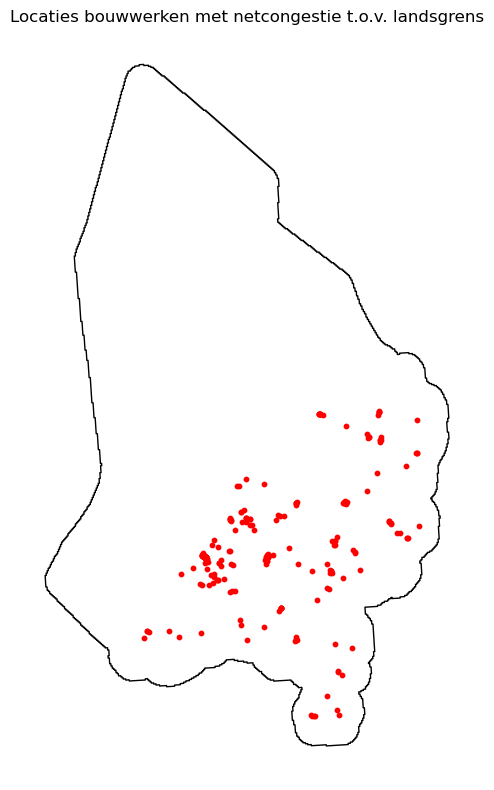

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display

# Read  buildings shapefile
gdf = gpd.read_file("Bouwwerken_netcongestie_data/Bouwwerken_netcongestie.shp")

print("Bouwwerken shapefile:")
display(gdf.head())       # first rows
print("Columns:", gdf.columns.tolist())
print("CRS (gdf):", gdf.crs)

# Read the Netherlands 1 km shapefile

nl = gpd.read_file("Netherlands_shapefile/nl_1km.shp")

print("\nNetherlands 1km shapefile (first rows):")
display(nl.head())
print("Columns:", nl.columns.tolist())
print("CRS (nl):", nl.crs)

#  Make sure NL is in the same CRS as the buildings
if nl.crs is None:
    nl = nl.set_crs(gdf.crs)
elif nl.crs != gdf.crs:
    nl = nl.to_crs(gdf.crs)

#  Create only the outer border of the Netherlands

nl_dissolved = nl.dissolve()          # single (multi)polygon
nl_border = nl_dissolved.boundary     # just the outline

# .  centroids of  building polygons as points
points = gdf.copy()
points["geometry"] = points.geometry.centroid



fig, ax = plt.subplots(figsize=(6, 8))

# Plot ONLY the Netherlands outer border
nl_border.plot(ax=ax, edgecolor="black", linewidth=1)

# Plot your buildings as red dots on top
points.plot(ax=ax, markersize=10, color="red")

ax.set_aspect("equal")  # keep correct proportions
ax.set_title("Locaties bouwwerken met netcongestie t.o.v. landsgrens")
ax.set_axis_off()

plt.tight_layout()
plt.show()
